In [39]:
!pip install pyspark

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [42]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

In [43]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/mareevga01/hadoop/input/economic_data/slb.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)


+----------+-----------------+-----------------+------------------+------------------+--------+
|      Date|            Close|             High|               Low|              Open|  Volume|
+----------+-----------------+-----------------+------------------+------------------+--------+
|2020-01-02|35.72967529296875|36.21888194831385| 35.64962699630554|36.040988927554466| 9147400|
|2020-01-03|36.07657241821289|36.59245850625719| 35.57847258059465|36.467934395109516| 9752000|
|2020-01-06|36.30783462524414|36.53909662022311|  35.7474726760559|36.121048439857354|15534100|
|2020-01-07|36.12105178833008|36.12105178833008|35.338324290732515| 36.04989320080839|10971700|
|2020-01-08|35.05369186401367|35.96983649658346|34.964747034978295|35.827522734310215|11327600|
+----------+-----------------+-----------------+------------------+------------------+--------+
only showing top 5 rows



In [44]:
pandas_df = df.toPandas()
pandas_df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,35.729675,36.218882,35.649627,36.040989,9147400
1,2020-01-03,36.076572,36.592459,35.578473,36.467934,9752000
2,2020-01-06,36.307835,36.539097,35.747473,36.121048,15534100
3,2020-01-07,36.121052,36.121052,35.338324,36.049893,10971700
4,2020-01-08,35.053692,35.969836,34.964747,35.827523,11327600


In [45]:
pandas_df.describe()

,Close,High,Low,Open,Volume
count,1297.000000,1297.000000,1297.000000,1297.000000,1.297000e+03
mean,36.485162,37.060129,35.912927,36.495136,1.256964e+07
std,12.560256,12.638142,12.474057,12.558840,5.967580e+06
min,10.876331,11.905293,10.713863,10.984643,3.077600e+06
25%,26.411093,26.949525,26.058326,26.536875,8.621200e+06
50%,38.183296,38.938894,37.495455,38.202078,1.127810e+07
75%,47.029564,47.542968,46.483387,46.990820,1.497120e+07
max,59.866184,59.885465,58.661148,59.702302,8.614800e+07


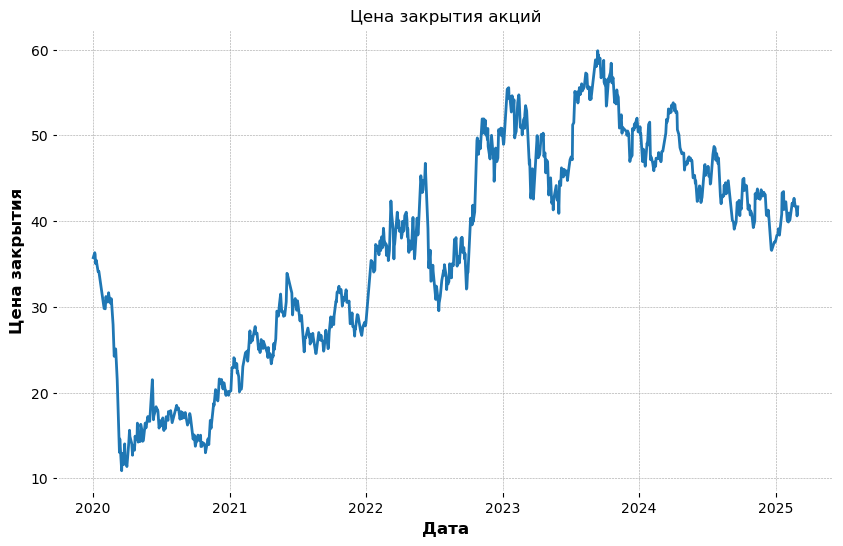

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Date'], pandas_df['Close'])
plt.title('Цена закрытия акций')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)
plt.show()

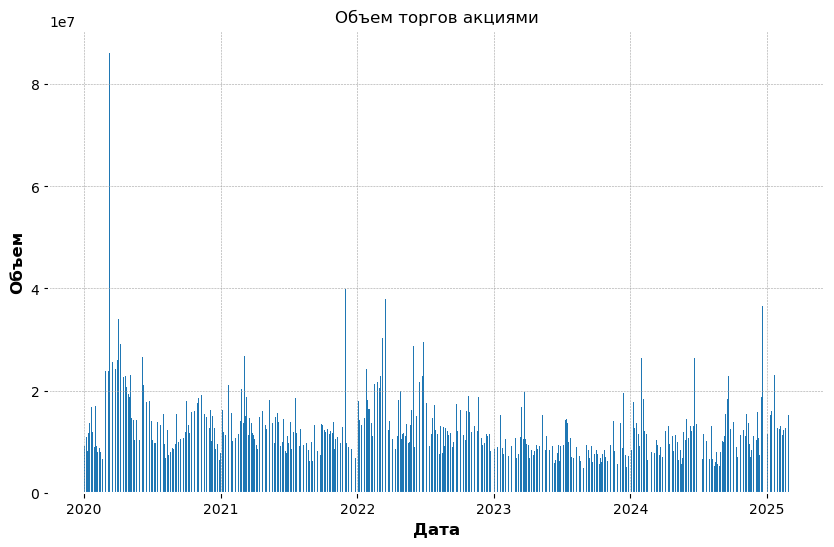

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(pandas_df['Date'], pandas_df['Volume'])
plt.title('Объем торгов акциями')
plt.xlabel('Дата')
plt.ylabel('Объем')
plt.grid(True)
plt.show()

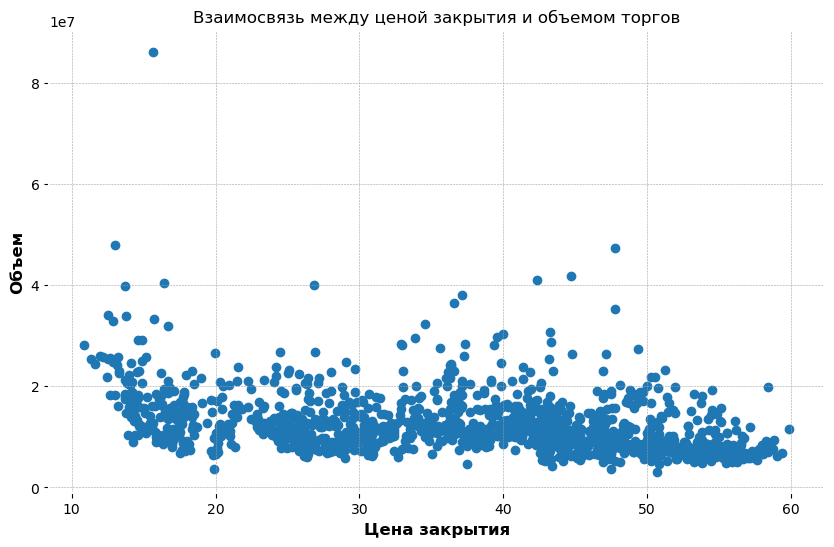

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['Close'], pandas_df['Volume'])
plt.title('Взаимосвязь между ценой закрытия и объемом торгов')
plt.xlabel('Цена закрытия')
plt.ylabel('Объем')
plt.grid(True)
plt.show()

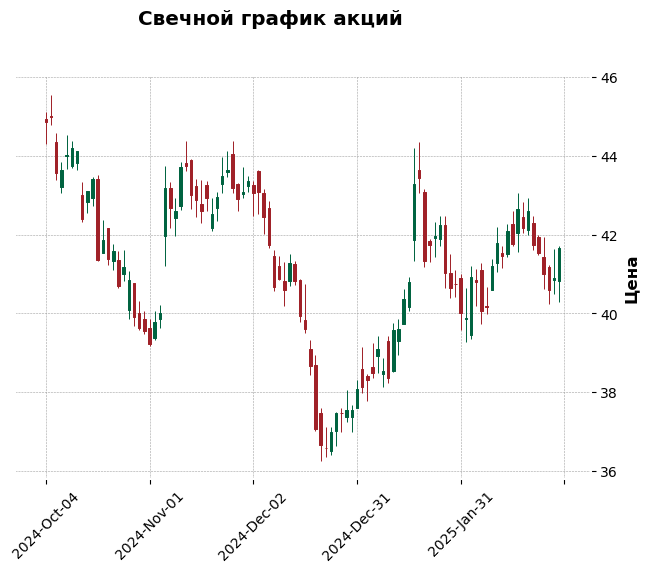

In [49]:
import mplfinance as mpf
 
# Преобразуем столбец 'Date' в формат datetime
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'])

# Устанавливаем 'Date' как индекс DataFrame
pandas_df.set_index('Date', inplace=True)

# Берем последние 100 записей
filtered_data = pandas_df.tail(100)

# Строим график
mpf.plot(filtered_data, type='candle', style='charles', title='Свечной график акций', ylabel='Цена')

In [52]:
# Фильтруем данные за февраль 2025 года
february_2025_data = pandas_df.loc['2025-02-01':'2025-02-28']

# Отображение статистики за февраль 2025 года
february_2025_summary_statistics = february_2025_data.describe()

# Выводим статистику
print(february_2025_summary_statistics)

           Close       High        Low       Open        Volume
count  19.000000  19.000000  19.000000  19.000000  1.900000e+01
mean   41.315123  41.835797  40.780130  41.249882  1.303457e+07
std     0.806294   0.731492   0.859941   0.842288  1.960964e+06
min    39.882328  40.637072  39.286478  39.465235  9.388100e+06
25%    40.860001  41.255001  40.220001  40.840000  1.193770e+07
50%    41.450001  41.720001  40.630001  41.279999  1.275250e+07
75%    41.764999  42.365000  41.514999  41.984999  1.439490e+07
max    42.650002  43.060001  42.049999  42.450001  1.774780e+07


In [53]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
data_spark = spark.createDataFrame(february_2025_data)


In [56]:
# Путь в HDFS для сохранения
file_path_hdfs = "hdfs://localhost:9000/mareevga01/hadoop/input/economic_data/february_2025_data.csv"

# Сохранение DataFrame в формате CSV в HDFS
data_spark.write.csv(file_path_hdfs, header=True, mode='overwrite')

In [ ]:
#Ошибка org.apache.hadoop.security.AccessControlException: 
# Permission denied указывает на то, что текущий пользователь (devops) не имеет прав на запись в указанный каталог HDFS (/user2/hadoop/economic_data).

Изменение прав доступа к каталогу:

Используйте команду hdfs dfs -chmod для изменения прав доступа и разрешения записи для нужного пользователя:
hdfs dfs -chmod 777 /user2/hadoop/economic_data